In [1]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt import risk_models
from pypfopt import plotting
#
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from torch.backends.mkl import verbose


In [2]:
df = pd.read_csv('../../data/df_monthly_returns_complete.csv', index_col='Date')
df_close = pd.read_csv('../../data/df_monthly_adjacent_close.csv', index_col=0)
df_overview = pd.read_csv('../../data/df_overview.csv', index_col=0)

In [5]:
# Step 1: Calculate Expected Returns
# Use the mean historical returns (default frequency is daily; set compounding to True for monthly).
mu = mean_historical_return(df, frequency=12, compounding=True)
print('step 1')
print(mu)
# Step 2: Calculate the Covariance Matrix
# Use a shrinkage method to estimate the covariance matrix.
cov_matrix = risk_models.sample_cov(df)
print('step 2')
# Step 3: Initialize the Efficient Frontier
ef = EfficientFrontier(mu, cov_matrix)
print('step 3')
# Step 4: Maximize the Sharpe Ratio
# Adjust weights to maximize the Sharpe ratio (risk-adjusted returns).
weights = ef.max_sharpe()
print('step 4')
# Step 5: Get Cleaned Weights
# The cleaned weights are adjusted for rounding errors.
cleaned_weights = ef.clean_weights()
print('step 5')
# Step 6: Display Portfolio Performance
performance = ef.portfolio_performance(verbose=True)

# Display the optimal weights
print("Optimal Weights:")
# print(cleaned_weights)


step 1
RS1.L    -0.000695
KE       -0.002441
TEG.DE    0.003703
LEG.DE    0.002624
SCS      -0.003260
            ...   
KVHI     -0.000427
MOON.L   -0.001615
NEO      -0.003183
6055.T   -0.003650
UNP      -0.000947
Length: 1653, dtype: float64


/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/risk_models.py:89: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn(


step 2
step 3


OptimizationError: Please check your objectives/constraints or use a different solver.

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/plotting.py:190: UserWarning:

Could not construct portfolio for parameter value 6.297

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/plotting.py:190: UserWarning:

Could not construct portfolio for parameter value 6.362

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/plotting.py:190: UserWarning:

Could not construct portfolio for parameter value 6.428

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/plotting.py:190: UserWarning:

Could not construct portfolio for parameter value 6.493



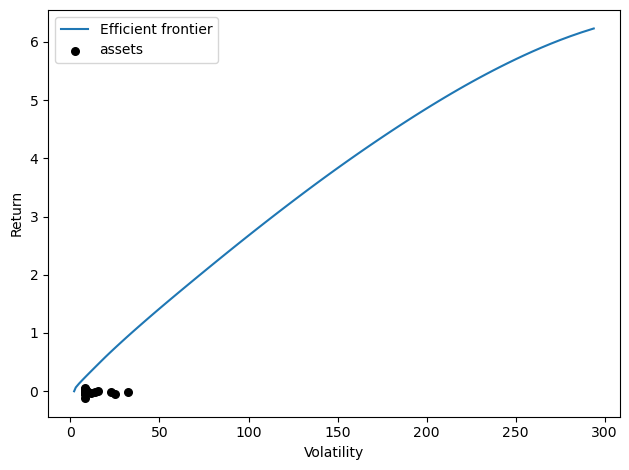

In [122]:
ef2 = EfficientFrontier(mu, cov_matrix, weight_bounds=(None, None))
ef2.add_constraint(lambda w: w[0] >= 0.2)
ef2.add_constraint(lambda w: w[2] == 0.15)
ef2.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.show()

### Standalone Optimal Portfolio Test - to check first